In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns

In [2]:
df_original = pd.read_csv("flu_train.csv")

In [3]:
df_original[df_original['HeadCirc'] != np.nan]['HeadCirc']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
5241     NaN
5242     NaN
5243    42.2
5244     NaN
5245     NaN
Name: HeadCirc, Length: 5246, dtype: float64

In [4]:
#cor = df_original.corr(method='pearson')
#fig, ax = plt.subplots(figsize=(15,15)) 
#sns.heatmap(cor, 
#            xticklabels=cor.columns,
#            yticklabels=cor.columns,
#            cmap='RdBu_r',
#            annot=True,
#            linewidth=1)

In [11]:
df_cleaned = df_original.copy()

# Changed Male/Female to 1/0 for a boolean datatype
df_cleaned.loc[(df_cleaned['Gender'] == 'male'), 'Gender'] = 1
df_cleaned.loc[(df_cleaned['Gender'] == 'female'), 'Gender'] = 0

# Age of 0 is okay, we assume this are babies.
display(df_cleaned[df_cleaned['Age'] == 0]['Weight'].describe())


# Set everybody under age of 14 to No Degree
df_cleaned.loc[(pd.isna(df_cleaned['Education'])) & (df_cleaned['Age'] < 14), 'Education'] = 'No Degree'
df_cleaned.loc[(pd.isna(df_cleaned['Education'])), 'Education'] = 'Unknown'

# Set Marital Status to unknown for the missing values
df_cleaned.loc[(pd.isna(df_cleaned['MaritalStatus'])), 'MaritalStatus'] = 'Unknown'

# Delete all rows where HHIncome is nan
df_cleaned.dropna(subset=['HHIncomeMid'], inplace=True)

#df_cleaned[pd.isna(df_cleaned['Poverty'])]
#df_cleaned.plot.scatter(y = 'Poverty', x='HHIncomeMid')
# Deleting missing poverty values for now, if it is import we can do a lin reg later on.
df_cleaned.loc[(df_cleaned['Poverty'] == 0) & (df_cleaned['HHIncome'] == 'more 99999'), 'Poverty'] = math.nan
df_cleaned.dropna(subset=['Poverty'], inplace=True)

del df_cleaned['HHIncome']
#display(df_cleaned[df_cleaned['Poverty'] == 0])


df_cleaned.dropna(subset=['HomeRooms'], inplace=True)
df_cleaned.dropna(subset=['HomeOwn'], inplace=True)
df_cleaned.loc[(pd.isna(df_cleaned['Work'])), 'Work'] = 'Unknown'
df_cleaned['Weight'].fillna((df_cleaned['Weight'].mean()), inplace=True)

# df_cleaned = df_cleaned[(pd.isna(df_cleaned.Length)) & (pd.notna(df_cleaned.Height))]
df_cleaned.loc[((pd.notna(df_cleaned.Length)) & (pd.isna(df_cleaned.Height))), 'Height'] = df_cleaned[(pd.notna(df_cleaned.Length)) & (pd.isna(df_cleaned.Height))][['Length']]
df_cleaned.dropna(subset=['Height'], inplace=True)
del df_cleaned['Length']

del df_cleaned['HeadCirc']
del df_cleaned['BMICatUnder20yrs']
del df_cleaned['BMI_WHO']
df_cleaned.dropna(subset=['BMI'], inplace=True)

df_cleaned.loc[(pd.isna(df_cleaned['Pulse'])) & (df_cleaned.flu == 1), 'Pulse'] = np.mean(df_cleaned[df_cleaned.flu == 1]['Pulse'])
df_cleaned.loc[(pd.isna(df_cleaned['Pulse'])) & (df_cleaned.flu == 0), 'Pulse'] = np.mean(df_cleaned[df_cleaned.flu == 0]['Pulse'])

df_cleaned.loc[(pd.isna(df_cleaned['BPSysAve'])) & (df_cleaned.flu == 1), 'BPSysAve'] = np.mean(df_cleaned[df_cleaned.flu == 1]['BPSysAve'])
df_cleaned.loc[(pd.isna(df_cleaned['BPSysAve'])) & (df_cleaned.flu == 0), 'BPSysAve'] = np.mean(df_cleaned[df_cleaned.flu == 0]['BPSysAve'])

df_cleaned.loc[(pd.isna(df_cleaned['BPDiaAve'])) & (df_cleaned.flu == 1), 'BPDiaAve'] = np.mean(df_cleaned[df_cleaned.flu == 1]['BPDiaAve'])
df_cleaned.loc[(pd.isna(df_cleaned['BPDiaAve'])) & (df_cleaned.flu == 0), 'BPDiaAve'] = np.mean(df_cleaned[df_cleaned.flu == 0]['BPDiaAve'])

df_cleaned.loc[(pd.isna(df_cleaned['BPSys1'])) & (df_cleaned.flu == 1), 'BPSys1'] = np.mean(df_cleaned[df_cleaned.flu == 1]['BPSys1'])
df_cleaned.loc[(pd.isna(df_cleaned['BPSys1'])) & (df_cleaned.flu == 0), 'BPSys1'] = np.mean(df_cleaned[df_cleaned.flu == 0]['BPSys1'])

df_cleaned.loc[(pd.isna(df_cleaned['BPDia1'])) & (df_cleaned.flu == 1), 'BPDia1'] = np.mean(df_cleaned[df_cleaned.flu == 1]['BPDia1'])
df_cleaned.loc[(pd.isna(df_cleaned['BPDia1'])) & (df_cleaned.flu == 0), 'BPDia1'] = np.mean(df_cleaned[df_cleaned.flu == 0]['BPDia1'])

df_cleaned.loc[(pd.isna(df_cleaned['BPSys2'])) & (df_cleaned.flu == 1), 'BPSys2'] = np.mean(df_cleaned[df_cleaned.flu == 1]['BPSys2'])
df_cleaned.loc[(pd.isna(df_cleaned['BPSys2'])) & (df_cleaned.flu == 0), 'BPSys2'] = np.mean(df_cleaned[df_cleaned.flu == 0]['BPSys2'])

df_cleaned.loc[(pd.isna(df_cleaned['BPDia2'])) & (df_cleaned.flu == 1), 'BPDia2'] = np.mean(df_cleaned[df_cleaned.flu == 1]['BPDia2'])
df_cleaned.loc[(pd.isna(df_cleaned['BPDia2'])) & (df_cleaned.flu == 0), 'BPDia2'] = np.mean(df_cleaned[df_cleaned.flu == 0]['BPDia2'])

df_cleaned.loc[(pd.isna(df_cleaned['BPSys3'])) & (df_cleaned.flu == 1), 'BPSys3'] = np.mean(df_cleaned[df_cleaned.flu == 1]['BPSys3'])
df_cleaned.loc[(pd.isna(df_cleaned['BPSys3'])) & (df_cleaned.flu == 0), 'BPSys3'] = np.mean(df_cleaned[df_cleaned.flu == 0]['BPSys3'])

df_cleaned.loc[(pd.isna(df_cleaned['BPDia3'])) & (df_cleaned.flu == 1), 'BPDia3'] = np.mean(df_cleaned[df_cleaned.flu == 1]['BPDia3'])
df_cleaned.loc[(pd.isna(df_cleaned['BPDia3'])) & (df_cleaned.flu == 0), 'BPDia3'] = np.mean(df_cleaned[df_cleaned.flu == 0]['BPDia3'])

df_cleaned.Testosterone = df_cleaned.Testosterone.astype(float)
df_cleaned.loc[(pd.isna(df_cleaned['Testosterone'])) & (df_cleaned.flu == 1), 'Testosterone'] = np.mean(df_cleaned[df_cleaned.flu == 1]['Testosterone'])
df_cleaned.loc[(pd.isna(df_cleaned['Testosterone'])) & (df_cleaned.flu == 0), 'Testosterone'] = np.mean(df_cleaned[df_cleaned.flu == 0]['Testosterone'])

df_cleaned.loc[(pd.isna(df_cleaned['DirectChol'])) & (df_cleaned.flu == 1), 'DirectChol'] = np.mean(df_cleaned[df_cleaned.flu == 1]['DirectChol'])
df_cleaned.loc[(pd.isna(df_cleaned['DirectChol'])) & (df_cleaned.flu == 0), 'DirectChol'] = np.mean(df_cleaned[df_cleaned.flu == 0]['DirectChol'])

df_cleaned.loc[(pd.isna(df_cleaned['TotChol'])) & (df_cleaned.flu == 1), 'TotChol'] = np.mean(df_cleaned[df_cleaned.flu == 1]['TotChol'])
df_cleaned.loc[(pd.isna(df_cleaned['TotChol'])) & (df_cleaned.flu == 0), 'TotChol'] = np.mean(df_cleaned[df_cleaned.flu == 0]['TotChol'])

df_cleaned.loc[(pd.isna(df_cleaned['UrineVol1'])) & (df_cleaned.flu == 1), 'UrineVol1'] = np.mean(df_cleaned[df_cleaned.flu == 1]['UrineVol1'])
df_cleaned.loc[(pd.isna(df_cleaned['UrineVol1'])) & (df_cleaned.flu == 0), 'UrineVol1'] = np.mean(df_cleaned[df_cleaned.flu == 0]['UrineVol1'])

df_cleaned.loc[(pd.isna(df_cleaned['UrineFlow1'])) & (df_cleaned.flu == 1), 'UrineFlow1'] = np.mean(df_cleaned[df_cleaned.flu == 1]['UrineFlow1'])
df_cleaned.loc[(pd.isna(df_cleaned['UrineFlow1'])) & (df_cleaned.flu == 0), 'UrineFlow1'] = np.mean(df_cleaned[df_cleaned.flu == 0]['UrineFlow1'])

del df_cleaned['UrineVol2']
del df_cleaned['UrineFlow2']

df_cleaned.loc[(df_cleaned['Diabetes'] == 'Yes'), 'Diabetes'] = 1
df_cleaned.loc[(df_cleaned['Diabetes'] == 'No'), 'Diabetes'] = 0
df_cleaned.dropna(subset=['Diabetes'], inplace=True)
del df_cleaned['DiabetesAge']

df_cleaned.loc[(pd.isna(df_cleaned['HealthGen'])), 'HealthGen'] = 'Unknown'

df_cleaned.loc[(pd.isna(df_cleaned['DaysMentHlthBad'])) & (df_cleaned.flu == 1), 'DaysMentHlthBad'] = np.mean(df_cleaned[df_cleaned.flu == 1]['DaysMentHlthBad'])
df_cleaned.loc[(pd.isna(df_cleaned['DaysMentHlthBad'])) & (df_cleaned.flu == 0), 'DaysMentHlthBad'] = np.mean(df_cleaned[df_cleaned.flu == 0]['DaysMentHlthBad'])


df_cleaned.loc[(pd.isna(df_cleaned['LittleInterest'])), 'LittleInterest'] = 'Unknown'
df_cleaned.loc[(pd.isna(df_cleaned['Depressed'])), 'Depressed'] = 'Unknown'

# Missing values in "nPregnancies", "nBabies", "Age1stBaby" to 0, it isn't logical to take the average here.
df_cleaned.loc[(pd.isna(df_cleaned['nPregnancies'])), 'nPregnancies'] = 0
df_cleaned.loc[(pd.isna(df_cleaned['nBabies'])), 'nBabies'] = 0
df_cleaned.loc[(pd.isna(df_cleaned['Age1stBaby'])), 'Age1stBaby'] = 0

df_cleaned.loc[(pd.isna(df_cleaned['SleepHrsNight'])) & (df_cleaned.flu == 1), 'SleepHrsNight'] = np.mean(df_cleaned[df_cleaned.flu == 1]['SleepHrsNight'])
df_cleaned.loc[(pd.isna(df_cleaned['SleepHrsNight'])) & (df_cleaned.flu == 0), 'SleepHrsNight'] = np.mean(df_cleaned[df_cleaned.flu == 0]['SleepHrsNight'])

df_cleaned.loc[(df_cleaned['SleepTrouble'] == 'Yes'), 'SleepTrouble'] = 1
df_cleaned.loc[(df_cleaned['SleepTrouble'] == 'No'), 'SleepTrouble'] = 0
#df_cleaned.loc[(pd.isnull(df_cleaned['SleepTrouble'])), 'SleepTrouble'] = 'Unknown'

df_cleaned.loc[(df_cleaned['PhysActive'] == 'Yes'), 'PhysActive'] = 1
df_cleaned.loc[(df_cleaned['PhysActive'] == 'No'), 'PhysActive'] = 0

df_cleaned.loc[(pd.isna(df_cleaned['PhysActiveDays'])), 'PhysActiveDays'] = 0
df_cleaned.loc[(pd.isna(df_cleaned['TVHrsDay'])), 'TVHrsDay'] = 'Unknown'
df_cleaned.loc[(pd.isna(df_cleaned['CompHrsDay'])), 'CompHrsDay'] = 'Unknown'

df_cleaned.loc[(pd.isna(df_cleaned['TVHrsDayChild'])), 'TVHrsDayChild'] = 0
df_cleaned.loc[(pd.isna(df_cleaned['CompHrsDayChild'])), 'CompHrsDayChild'] = 0

df_cleaned.loc[(df_cleaned['Alcohol12PlusYr'] == 'Yes'), 'Alcohol12PlusYr'] = 1
df_cleaned.loc[(df_cleaned['Alcohol12PlusYr'] == 'No'), 'Alcohol12PlusYr'] = 0

df_cleaned.loc[(pd.isna(df_cleaned['AlcoholDay'])), 'AlcoholDay'] = 0
df_cleaned.loc[(pd.isna(df_cleaned['AlcoholYear'])), 'AlcoholYear'] = 0

df_cleaned.loc[(df_cleaned['SmokeNow'] == 'Yes'), 'SmokeNow'] = 1
df_cleaned.loc[(df_cleaned['SmokeNow'] == 'No'), 'SmokeNow'] = 0

df_cleaned.loc[(df_cleaned['Smoke100'] == 'Yes'), 'Smoke100'] = 1
df_cleaned.loc[(df_cleaned['Smoke100'] == 'No'), 'Smoke100'] = 0
df_cleaned.loc[(pd.isna(df_cleaned['Smoke100n'])) & (df_cleaned['Smoke100'] == 1), 'Smoke100n'] = 'Smoker'
df_cleaned.loc[(pd.isna(df_cleaned['Smoke100n'])), 'Smoke100n'] = 'Unknown'

df_cleaned.loc[(pd.isna(df_cleaned['SmokeAge'])), 'SmokeAge'] = 0

df_cleaned.loc[(df_cleaned['Marijuana'] == 'Yes'), 'Marijuana'] = 1
df_cleaned.loc[(df_cleaned['Marijuana'] == 'No'), 'Marijuana'] = 0
df_cleaned.loc[(pd.isna(df_cleaned['Marijuana'])), 'Marijuana'] = 0

df_cleaned.loc[(pd.isna(df_cleaned['AgeFirstMarij'])), 'AgeFirstMarij'] = 0

df_cleaned.loc[(df_cleaned['RegularMarij'] == 'Yes'), 'RegularMarij'] = 1
df_cleaned.loc[(df_cleaned['RegularMarij'] == 'No'), 'RegularMarij'] = 0
df_cleaned.loc[(pd.isna(df_cleaned['RegularMarij'])), 'RegularMarij'] = 0

df_cleaned.loc[(pd.isna(df_cleaned['AgeRegMarij'])), 'AgeRegMarij'] = 0

df_cleaned.loc[(df_cleaned['HardDrugs'] == 'Yes'), 'HardDrugs'] = 1
df_cleaned.loc[(df_cleaned['HardDrugs'] == 'No'), 'HardDrugs'] = 0
df_cleaned.loc[(pd.isna(df_cleaned['HardDrugs'])), 'HardDrugs'] = 0

df_cleaned.loc[(df_cleaned['SexEver'] == 'Yes'), 'SexEver'] = 1
df_cleaned.loc[(df_cleaned['SexEver'] == 'No'), 'SexEver'] = 0
df_cleaned.loc[(pd.isna(df_cleaned['SexEver'])), 'SexEver'] = 0

df_cleaned.loc[(pd.isna(df_cleaned['SexAge'])), 'SexAge'] = 0

df_cleaned.loc[(pd.isna(df_cleaned['SexNumPartnLife'])), 'SexNumPartnLife'] = 0
df_cleaned.loc[(pd.isna(df_cleaned['SexNumPartYear'])), 'SexNumPartYear'] = 0

df_cleaned.loc[(df_cleaned['SameSex'] == 'Yes'), 'SameSex'] = 1
df_cleaned.loc[(df_cleaned['SameSex'] == 'No'), 'SameSex'] = 0
df_cleaned.loc[(pd.isna(df_cleaned['SameSex'])), 'SameSex'] = 0

df_cleaned.loc[(pd.isna(df_cleaned['SexOrientation'])), 'SexOrientation'] = 'Unknown'

df_cleaned.loc[(pd.isna(df_cleaned['PregnantNow'])), 'PregnantNow'] = 'Unknown'

df_cleaned.info()
df_cleaned.isnull().sum()

count    101.000000
mean       7.850495
std        2.051956
min        2.800000
25%        6.100000
50%        8.000000
75%        9.400000
max       12.700000
Name: Weight, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4564 entries, 0 to 5245
Data columns (total 64 columns):
ID                 4564 non-null int64
Gender             4564 non-null int64
Age                4564 non-null int64
Race1              4564 non-null object
Education          4564 non-null object
MaritalStatus      4564 non-null object
HHIncomeMid        4564 non-null float64
Poverty            4564 non-null float64
HomeRooms          4564 non-null float64
HomeOwn            4564 non-null object
Work               4564 non-null object
Weight             4564 non-null float64
Height             4564 non-null float64
BMI                4564 non-null float64
Pulse              4564 non-null float64
BPSysAve           4564 non-null float64
BPDiaAve           4564 non-null float64
BPSys1             4564 non-null float64
BPDia1             4564 non-null float64
BPSys2             4564 non-null float64
BPDia2             4564 non-null float64
BPSys3             4564 non-null float64
BP

ID                0
Gender            0
Age               0
Race1             0
Education         0
                 ..
SexNumPartYear    0
SameSex           0
SexOrientation    0
PregnantNow       0
flu               0
Length: 64, dtype: int64

In [6]:
# Transform all categorical columns
# The columns HIncome and BMI_WHO are deleted

df_cleaned_dummy = pd.get_dummies(df_cleaned[['Race1', 'Education', 'MaritalStatus', 'HomeOwn', 'Work', 'HealthGen', 'LittleInterest', 'Depressed', 'TVHrsDay', 'CompHrsDay', 'Smoke100n', 'SexOrientation', 'PregnantNow']])

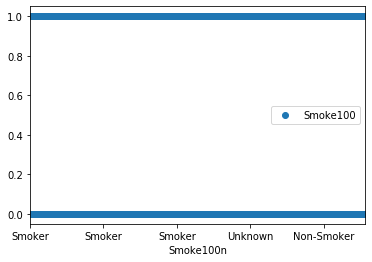

In [12]:
df_cleaned.plot(x ='Smoke100n', y = 'Smoke100', style='o')


In [8]:
df_cleaned.head()

,ID,Gender,Age,Race1,Education,MaritalStatus,HHIncomeMid,Poverty,HomeRooms,HomeOwn,...,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow,flu
0,51624,1,34,White,High School,Married,30000.0,1.36,6.0,Own,...,0.0,1,1,16.0,8.0,1.0,0,Heterosexual,Unknown,0
1,51630,0,49,White,Some College,LivePartner,40000.0,1.91,5.0,Rent,...,0.0,1,1,12.0,10.0,1.0,1,Heterosexual,Unknown,0
2,51638,1,9,White,No Degree,Unknown,87500.0,1.84,6.0,Rent,...,0.0,NaN,NaN,0.0,0.0,0.0,0,Unknown,Unknown,0
3,51646,1,8,White,No Degree,Unknown,60000.0,2.33,7.0,Own,...,0.0,NaN,NaN,0.0,0.0,0.0,0,Unknown,Unknown,0
4,51647,0,45,White,College Grad,Married,87500.0,5.00,6.0,Own,...,0.0,0,1,13.0,20.0,0.0,1,Bisexual,Unknown,0
